<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/ejercicio_con_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

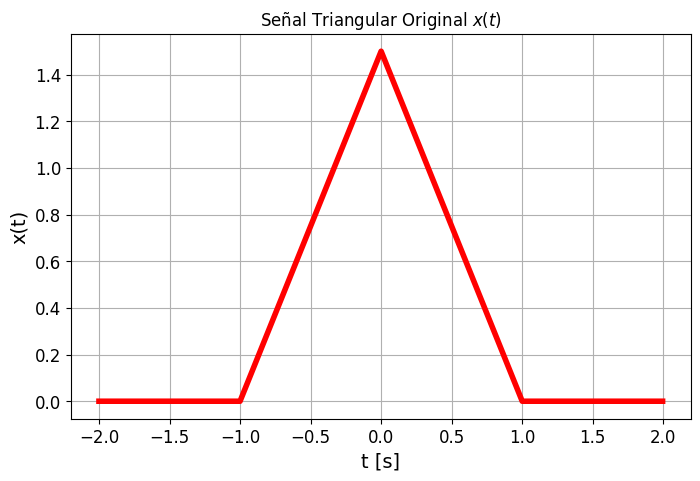

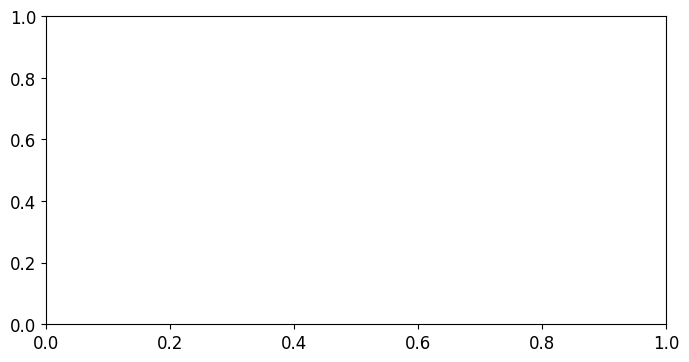

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

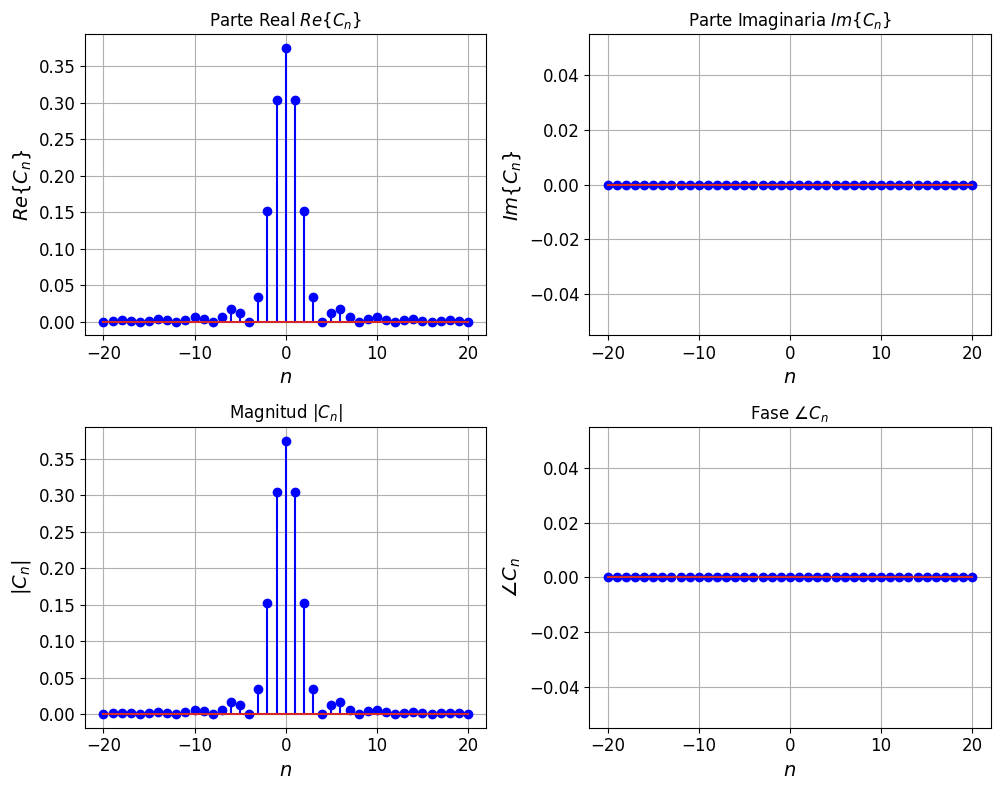

interactive(children=(IntSlider(value=1, description='Na', max=20), Output()), _dom_classes=('widget-interact'…

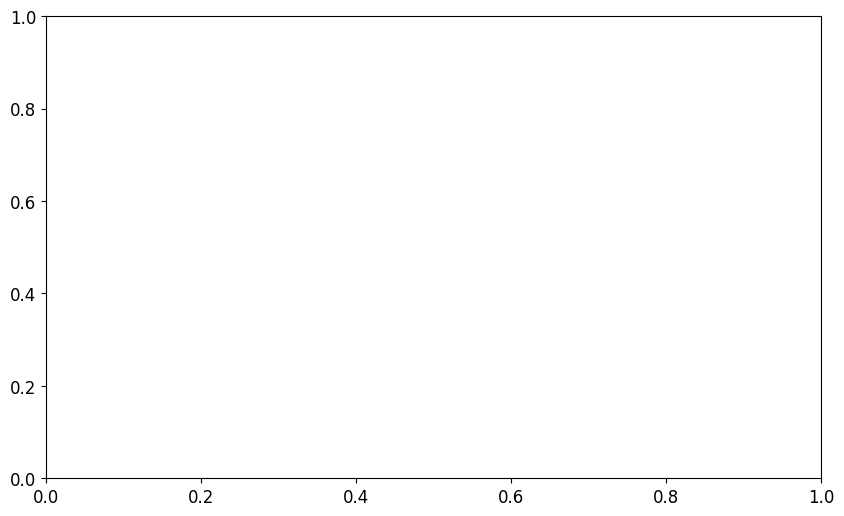

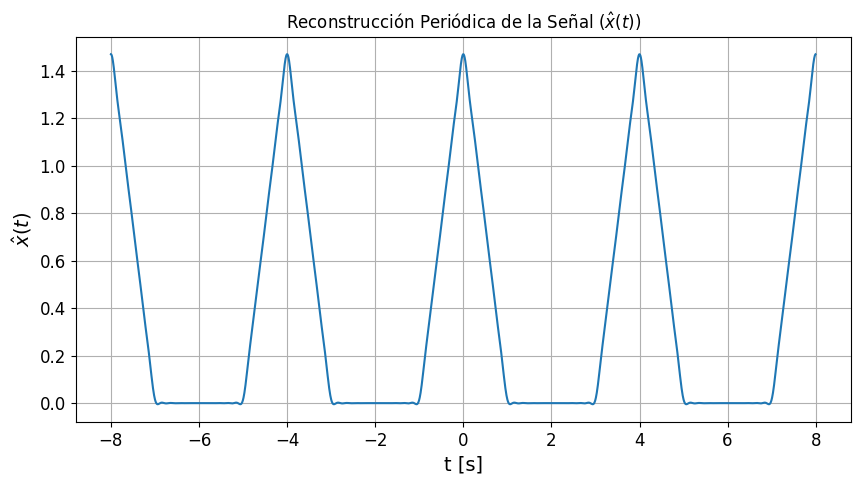

In [3]:

# - A continuación, se presentan las simulaciones respectivas.

# %%
# Para graficar y calcular
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
from ipywidgets import interact, IntSlider
from matplotlib import animation, rc
from IPython.display import HTML

warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# %%
# --- PARÁMETROS DE LA SEÑAL TRIANGULAR ---
B = 1.5      # Amplitud de la señal
T = 4        # Periodo en segundos
d = 1        # La mitad del ancho del pulso triangular (d < T/2)
Fs = 200     # Frecuencia de muestreo
# -----------------------------------------

tv = np.arange(-T/2, T/2, 1/Fs) # Vector de tiempo para un periodo
Nm = len(tv) # Número de muestras

# Se crea la señal triangular
xo = np.zeros_like(tv)
indices_pulso = np.abs(tv) <= d # Indices donde el pulso es no nulo
xo[indices_pulso] = B * (1 - np.abs(tv[indices_pulso]) / d)

# Graficar señal original
plt.figure(figsize=(8, 5))
plt.plot(tv, xo, 'r', linewidth=4)
plt.grid()
plt.title("Señal Triangular Original $x(t)$")
plt.xlabel("t [s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.show()

# %%
# --- BASES DE FOURIER ---
N = 20 # Número máximo de armónicos a considerar
wo = 2 * np.pi / T # Frecuencia fundamental

# Matriz para guardar las bases
phin = np.zeros((Nm, 2*N+1), dtype=np.complex128)
for n in range(-N, N+1):
    phin[:, n+N] = np.exp(1j * n * wo * tv) # Base de Fourier

# Animación interactiva para visualizar las bases
fig_bases, ax_bases = plt.subplots(1, 1, figsize=(8, 4))
def pltbase(n=1):
    ax_bases.clear()
    ax_bases.plot(tv, np.real(phin[:, int(n+N)]), label="Re{$\phi_n$(t)}")
    ax_bases.plot(tv, np.imag(phin[:, int(n+N)]), label="Im{$\phi_n$(t)}")
    ax_bases.plot(tv, xo, 'r', linewidth=4, label='$x(t)$', alpha=0.7)
    ax_bases.grid()
    ax_bases.set_xlabel("t [s]", fontsize = 14)
    ax_bases.set_ylabel("$\phi_n$(t)", fontsize = 14)
    ax_bases.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax_bases.set_title(f'Base para el armónico n = {n}')
    plt.show()

interact(pltbase, n=(-N, N, 1))


# %%
# --- CÁLCULO Y GRÁFICA DEL ESPECTRO ---

# Vector de armónicos
nv = np.linspace(-N, N, 2*N+1)

# Calcular el espectro Cn usando la fórmula analítica
# np.sinc(x) calcula sin(pi*x)/(pi*x), que es lo que necesitamos.
# Esta fórmula maneja n=0 correctamente.
Cn = (B * d / T) * (np.sinc(nv * d / T))**2

# Graficar el espectro (Real, Imaginario, Magnitud y Fase)
fig_spec = plt.figure(figsize=(10, 8))

# Parte Real
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(Cn), 'b')
plt.title(r'Parte Real $Re\{C_n\}$')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.grid()

# Parte Imaginaria (debería ser cero para una señal par)
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(Cn), 'b')
plt.title(r'Parte Imaginaria $Im\{C_n\}$')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.grid()

# Magnitud
plt.subplot(2, 2, 3)
plt.stem(nv, np.abs(Cn), 'b')
plt.title(r'Magnitud $|C_n|$')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.grid()

# Fase
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(Cn), 'b')
plt.title(r'Fase $\angle C_n$')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$\angle C_n$', fontsize=14)
plt.grid()

fig_spec.tight_layout()
plt.show()


# %%
# --- RECONSTRUCCIÓN Y ERROR RELATIVO ---

# Potencia promedio de la señal triangular
Px = (2 * B**2 * d) / (3 * T)

def pltest(Na=1):
    # Índices de los armónicos a usar para la reconstrucción (-Na a +Na)
    ind = np.arange(N - Na, N + Na + 1)

    # Suma de potencias de los coeficientes seleccionados
    P_reconstruida = np.sum(np.abs(Cn[ind])**2)

    # Error relativo porcentual
    er = 1 - (P_reconstruida / Px)

    # Señal reconstruida (producto punto entre las bases y los coeficientes)
    xe = phin[:, ind].dot(Cn[ind])

    plt.figure(figsize=(10, 6))
    plt.plot(tv, xo, color='r', linewidth=4, label='x(t) Original')
    plt.plot(tv, np.real(xe), color='b', linewidth=2, label='$x_e(t)$ Reconstruida') # se grafica la parte real
    plt.title(f'Reconstrucción con $N_a = {Na}$ armónicos\n$E_r$ = {100*er:.2f}%', fontsize=16)
    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

# Slider interactivo para la reconstrucción
interact(pltest, Na=(0, N, 1))

# %%
# --- ANIMACIÓN DE LA RECONSTRUCCIÓN ---

fig_anim, ax_anim = plt.subplots(1, 1, figsize=(10, 6))

def update(n_anim):
    ax_anim.clear()

    # Índices y cálculo del error
    ind = np.arange(N - n_anim, N + n_anim + 1)
    P_reconstruida = np.sum(np.abs(Cn[ind])**2)
    er = 1 - P_reconstruida / Px

    # Señal reconstruida y error en el tiempo
    xe = phin[:, ind].dot(Cn[ind])
    et = xo - np.real(xe)

    # Gráficas
    ax_anim.plot(tv, xo, 'r', linewidth=4, label='$x(t)$ Original', alpha=0.6)
    ax_anim.plot(tv, np.real(xe), color='b', label='$x_e(t)$ Reconstruida')
    ax_anim.plot(tv, et, color='g', linestyle='--', label='$e(t)$ Error', alpha=0.8)

    ax_anim.set_title(f'Reconstrucción con N = {n_anim} armónicos | $E_r$ = {100*er:.2f}%')
    ax_anim.set_xlabel('t [s]')
    ax_anim.set_ylabel('x(t)')
    ax_anim.grid(True)
    ax_anim.legend(loc='upper right')
    ax_anim.set_ylim(min(np.min(xo)-0.5, -B-0.5), max(np.max(xo)+0.5, B+0.5))

# Desplegar animación (puede tardar unos segundos en generarse)
anim = animation.FuncAnimation(fig_anim, update, frames=np.arange(0, N + 1, 1), blit=False)
rc('animation', html='jshtml')

# Para mostrar la animación en entornos como Colab o Jupyter
# anim


# %%
# --- RECONSTRUCCIÓN FUERA DEL INTERVALO ---
# La serie de Fourier asume que la señal es periódica.
# Al reconstruir en un intervalo mayor, se replica la señal.

tT = np.arange(-2*T, 2*T, 1/Fs) # Graficamos 4 periodos
phinT = np.zeros((len(tT), 2*N+1), dtype=np.complex128)
for n in range(-N, N+1, 1):
    phinT[:, n+N] = np.exp(1j*n*wo*tT)

# Reconstrucción con todos los N armónicos calculados
xe_periodica = phinT.dot(Cn)
plt.figure(figsize=(10, 5))
plt.plot(tT, np.real(xe_periodica))
plt.title("Reconstrucción Periódica de la Señal ($\hat{x}(t)$)")
plt.xlabel('t [s]')
plt.ylabel('$\hat{x}(t)$')
plt.grid()
plt.show()